---

---
## Tarefa 3.5 - Análise Exploratória e Estatística Descritiva - Correlação

Esta tarefa consiste em realizar a análise de correlação de variáveis (atributos) por meio de diagramas de dispersão (scatterplot) e coeficiente de correlação de Pearson utilizando as bibliotecas e funções da linguagem Python.

Você deve implementar em Python e responder os itens solicitados abaixo utilizando a biblioteca [Matplotlib](https://matplotlib.org/) e/ou [Seaborn](https://seaborn.pydata.org/) e outras que desejar ou forem necessárias. 

[Clique aqui](https://colab.research.google.com/github/malegopc/DSBD/blob/main/Notebooks/Correla%C3%A7%C3%A3o.ipynb) para acessar um exemplo de notebook que contém as funções necessárias para a realização desta tarefa. 

---



---



In [ ]:
#######################
# ----- IMPORTS ----- #
#######################
import io
import requests
import numpy as np
import pandas as pd  # MANIPULAR BASES DE DADOS
import seaborn as sns  # GRAPHICS GENERATION
from sklearn import metrics  # METHODS TO EVALUATE THE BEST AI TEST PERFORMANCE
import matplotlib.pyplot as plt  # GRAPHICS GENERATION
from IPython.display import display
from sklearn.linear_model import LinearRegression  # AI TRAINING TEST
from sklearn.ensemble import RandomForestRegressor  # AI TRAINING TEST
from sklearn.model_selection import train_test_split  # AI LIBRARY

## PARTE I: *dataset [Advertising](https://github.com/malegopc/DSBD/blob/main/Datasets/Advertising/Advertising.csv)*

Este dataset mostra uma série de valores investidos em anúncios de TV, Rádio e jornais e os respectivos resultados de venda.

#### a-) Ler o dataset "*Advertising/Advertising.csv*" como dataframe utilizando a biblioteca Pandas e mostrar as 5 primeiras e 5 últimas linhas.

In [ ]:
ads_url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Advertising/Advertising.csv'
ads = requests.get(ads_url).content
ads_df = pd.read_csv(io.StringIO(ads.decode('utf-8')))
ads_df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
ads_df.tail(5)

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


#### b-) Mostre num mesmo quadro (usando subplots) os três diagramas de dispersão para os pares de variáveis: TV x sales, radio x sales e newspaper x sales.

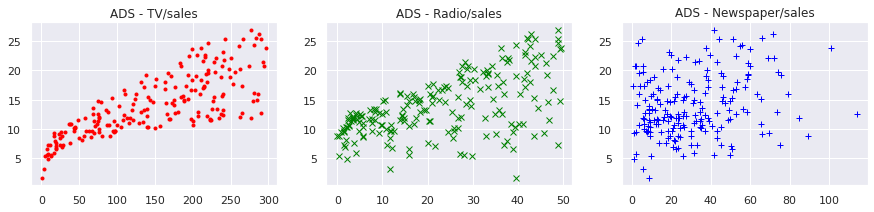

In [ ]:
sns.set(rc={'figure.figsize':(15,3)})

plt.subplot(1,3,1)
x = ads_df[["TV"]]
y = ads_df[["sales"]]
plt.title('ADS - TV/sales')
plt.plot(x, y, '.', color='red');

plt.subplot(1,3,2)
x = ads_df[["radio"]]
plt.title('ADS - Radio/sales')
plt.plot(x, y, 'x', color='green');

plt.subplot(1,3,3)
x = ads_df[["newspaper"]]
plt.title('ADS - Newspaper/sales')
plt.plot(x, y, '+', color='blue');
plt.show()

#### c-) Calcule o coeficiente de correlação de Pearson para os três pares de variáveis: TV x sales, radio x sales e newspaper x sales.

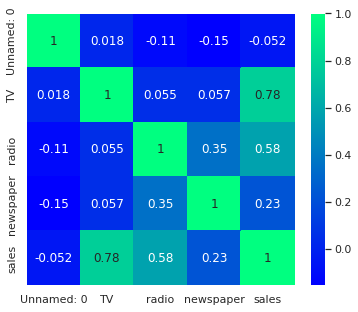

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})

sns.heatmap(ads_df.corr(), cmap="winter", annot=True)
plt.show()

#### d-) Analisando os diagramas de dispersão acima e os valores dos coeficientes de correlação responda qual dos tipos de anúncios influencia mais e qual deles influencia menos nos resultados das vendas?

Respostas:

* *Na faixa de -1 a 1, promovida pelo coeficiente de correlação de Pearson, quanto mais próximo a 1, maior a relação entre as instâncias.
Logo, os investimentos em marketing pela TV, tem maior relação com o número de vendas.*

* *TV > Rádio > Jornal*

## PARTE II: *dataset [Tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)*

Este dataset mostra diferentes atributos (valor da conta, gorjeta, número de pessoas, etc.) dos clientes de um restaurante.

#### e-) Faça a leitura do dataset "tips" disponível na biblioteca seaborn.

In [ ]:
tips_df = sns.load_dataset("tips")

#### f-) Mostre o diagrama de dispersão entre as variáveis "total_bill" e "tip" e calcule o coeficiente de correlação entr elas.





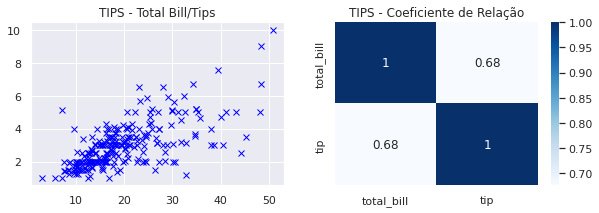

In [ ]:
sns.set(rc={'figure.figsize':(10,3)})
tips = tips_df[["total_bill","tip"]]

plt.subplot(1,2,1)
x = tips[["total_bill"]]
y = tips[["tip"]]
plt.title('TIPS - Total Bill/Tips')
plt.plot(x, y, 'x', color='blue');

# --

plt.subplot(1,2,2)
plt.title('TIPS - Coeficiente de Relação')
sns.heatmap(tips.corr(), cmap="Blues", annot=True)

plt.show()

#### g-) Responda:

i-) Existe correlação entre 'total_bill' e 'tip'? Resp:

ii-) Se sim, a correlação é positiva ou negativa? Resp:

iii-) Se sim, qual o grau de correlação? Forte, moderada ou fraca? Resp:

## PARTE III: *dataset [Atlas Brasil](https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Atlas/Atlas_Brasil_2014.csv)*

Este dataset mostra diferentes atributos valores de variáveis sociais para cada um dos estados brasileiros:

* ANOSEST = Média de anos de estudo
* T_ANALF25M = Taxa de analfabetismo - 25 anos ou mais
* MORT1 =	Mortalidade infantil
* RDPC = Renda per capita 
* POPTOT = População total
* IDHM = IDHM

#### h-) Ler o dataset "*Atlas/Atlas_Brasil_2014.csv*" como dataframe utilizando a biblioteca Pandas

In [ ]:
atls_url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Atlas/Atlas_Brasil_2014.csv'
atls = requests.get(atls_url).content
atls_df = pd.read_csv(io.StringIO(atls.decode('utf-8')))

#### i-) Utilizando a função "[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)" da biblioteca seaborn mostre os diagramas de dispersão com suas respectivas retas de regressão entre todos os pares de variáveis.

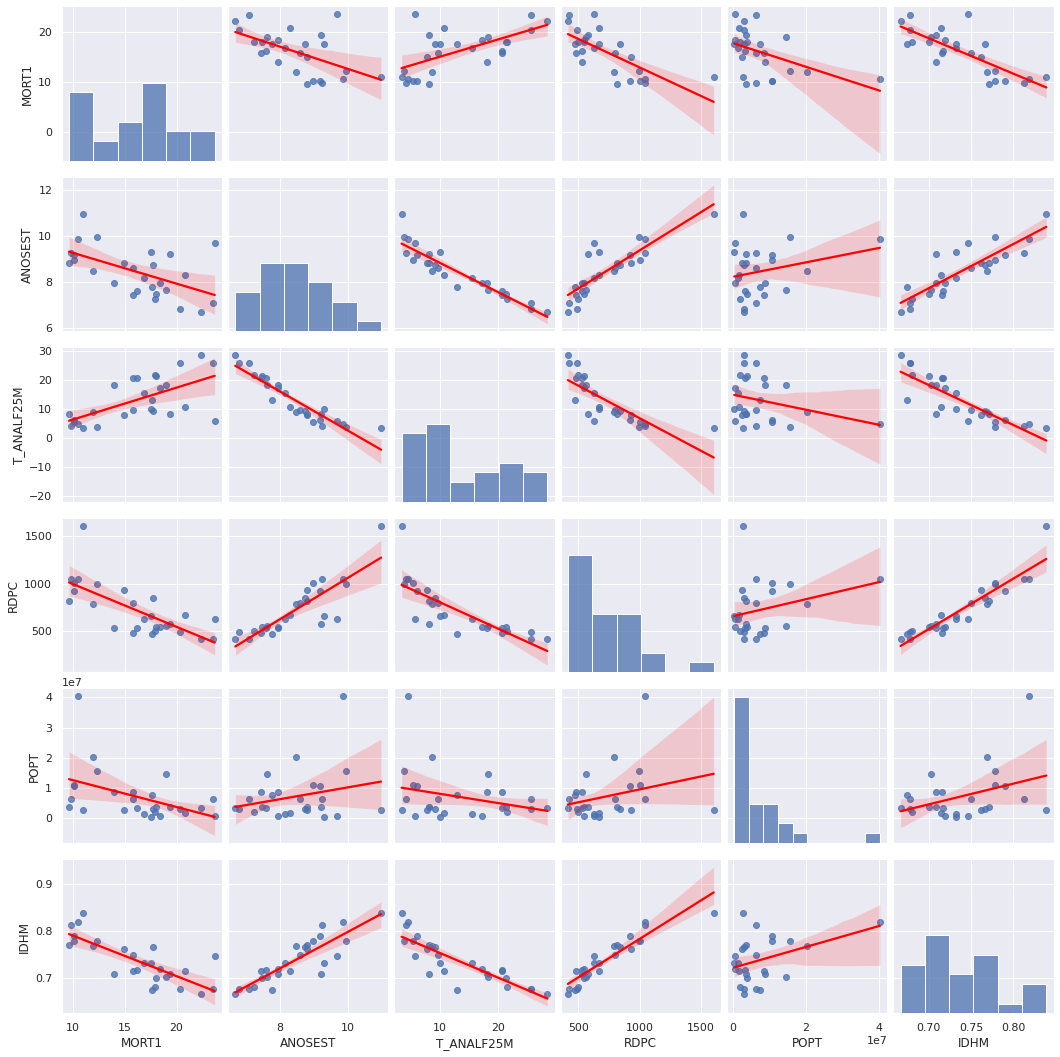

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})
sns.pairplot(atls_df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### j-) Obtenha a matriz de correlação entre todos os pares de variáveis.

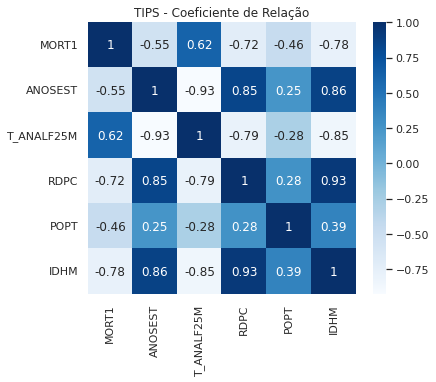

In [ ]:
plt.title('TIPS - Coeficiente de Relação')
sns.heatmap(atls_df.corr(), cmap="Blues", annot=True)
plt.show()

#### k-) Mostre um "mapa de calor" (heatmap) baseado na matriz de correlação entre todos os pares de variáveis.

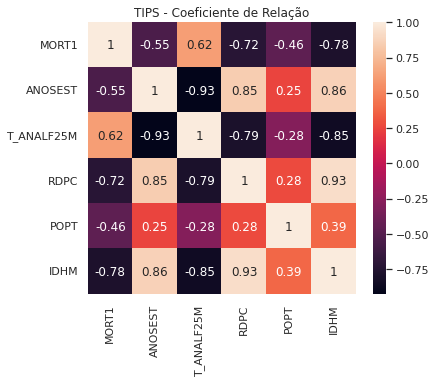

In [ ]:
plt.title('TIPS - Coeficiente de Relação')
sns.heatmap(atls_df.corr(), annot=True)
plt.show()

#### l-) Analisando os resultados acima, responda:

i-) Quais pares de variáveis são correlacionadas positivamente? Resp:

ii-) Quais pares de variáveis são correlacionadas negativamente? Resp:

iii-) Qual par de variáveis apresenta maior correlação (positiva e negativa)( desconsidere pares com as mesmas variáveis)? Resp:

**i-)**
* [mort1, t_analf25m]
* [anosest, rdpc]
* [anosest, popt]
* [rdpc, popt]
* [anosest, idhm]
* [rdpc, idhm]
* [popt, idhm]

**ii-)**
* [anosest, mort1]
* [anosest, t_analf25m]
* [t_analf25m, rdpc]
* [mort1, rdpc]
* [t_analf25m, popt]
* [mort1, popt]
* [t_analf25m, idhm]
* [mort1, idhm]

**iii-)**
* **Positiva**
  * [rdpc, idhm] = 0.96
* **Negativa**
  * [anosest, t_analf25m] = 0.93

